In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(329)

We will attempt to fit a model based on data generated from the underlying distribution $y = x^3 - 5x^2 + 6 + \sigma$, where $\sigma \sim \mathcal{N}(0, 10)$.

The inflection point of this distribution is at $(\frac{5}{3}, -\frac{88}{27})$. We will uniformly sample 100 random input points x centered around this point with a range of 14.

In [3]:
X = np.random.uniform(low=-5.333, high=8.667, size=100)
y = X**3 - 5 * X**2 + 6 + np.random.normal(scale=10, size=100)

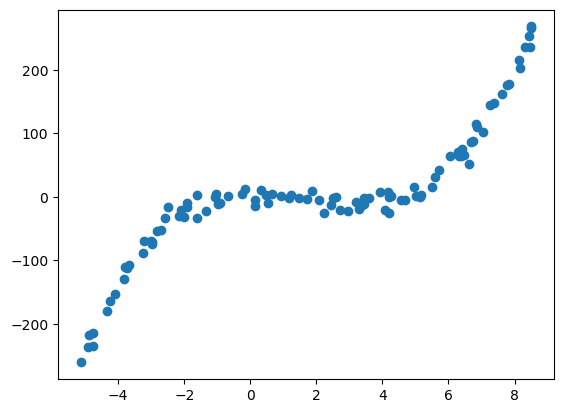

In [4]:
plt.scatter(X, y)
plt.show()

## Experiment 1

We will train a linear regression model using gradient descent to fit the above data. We will split the data into two subsets and train our model sequentially. Our model will have the form $\hat{y} = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3$.

Our objective function with be MSE loss, $E(\beta) = \frac{1}{2N}||Y - \phi(x)^T \beta||_2^2$ for $Y \in \mathbb{R}^{N}, \beta \in \mathbb{R}^{4}, \phi(x) \in \mathbb{R}^{(4, N)}$ with $N=100$.

We will use gradient descent with constant step size $\alpha$ so that our gradient descent update will be $\beta_{k+1} = \beta_k - \frac{\alpha}{N} [\phi(x)(\phi(x)^T\beta_k - Y)]$.

Our stopping criterion will be $|E(\beta_k) - E(\beta_{k+1})| < \epsilon$.

### Training Task A
For Task A, we will train on data points x that are less than the inflection point $x=\frac{5}{3}$.

### Training Task B
For Task B, we will take the model trained on task A and perform more gradient descent step updates using only the data points x that are greater than the inflection point $x=\frac{5}{3}$.

### Evaluation

After training on each task, we will evaluate the mean squared error of our model on each subset of the data. We will also evaluate the overall model performance on all of the data after training on both task A and B.

In [5]:
def phi_x(x, M):
    return np.array([x**i for i in range(M+1)])

In [6]:
def loss(beta, phi, y):
    return np.linalg.norm(y - phi.T @ beta)**2 / 2 / y.shape[0]

In [7]:
def train_task(X, y, learning_rate=1e-4, beta_0=np.zeros(4), max_iterations=10000):
    phi = phi_x(X, 3)
    n = y.shape[0]
    
    beta_previous = beta_0
    loss_logs = [loss(beta_previous, phi, y)]
    beta_logs = [beta_previous]
    
    max_iter = max_iterations
    epsilon = 1e-8
    alpha = learning_rate
    
    for k in range(max_iter):
        beta_current = beta_previous - alpha / n * (phi @ (phi.T @ beta_previous - y))
    
        loss_logs.append(loss(beta_current, phi, y))
        beta_logs.append(beta_current)
    
        if abs(loss_logs[-2] - loss_logs[-1]) < epsilon:
            break
    
        beta_previous = beta_current

    return loss_logs, beta_logs

In [8]:
taskA_indices = X <= 5/3
X_A = X[taskA_indices]
y_A = y[taskA_indices]

taskB_indices = X > 5/3
X_B = X[taskB_indices]
y_B = y[taskB_indices]

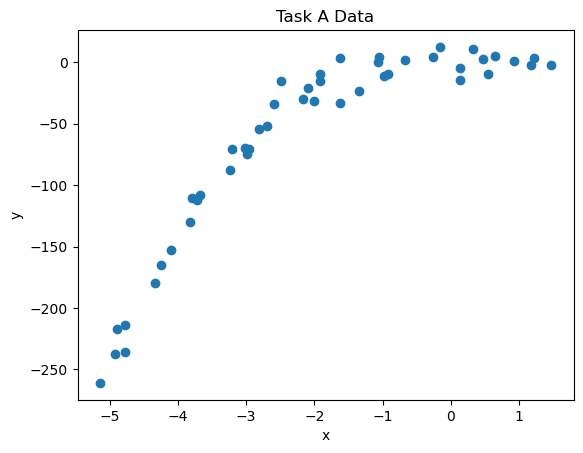

In [9]:
plt.scatter(X_A, y_A)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Task A Data')
plt.show()

In [10]:
losses_A, betas_A = train_task(X_A, y_A, learning_rate=1e-4, max_iterations=25000)

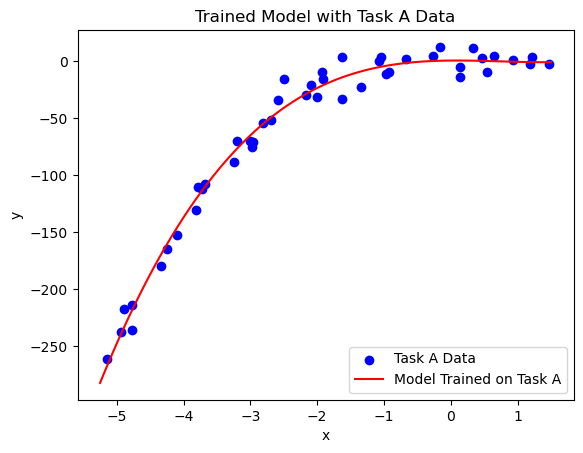

In [11]:
plt.scatter(X_A, y_A, color='blue', label='Task A Data')
plt.plot(np.linspace(-5.25, 1.5, 100), phi_x(np.linspace(-5.25, 1.5, 100), 3).T @ betas_A[-1], color='red', label='Model Trained on Task A')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model with Task A Data')
plt.legend()
plt.show()

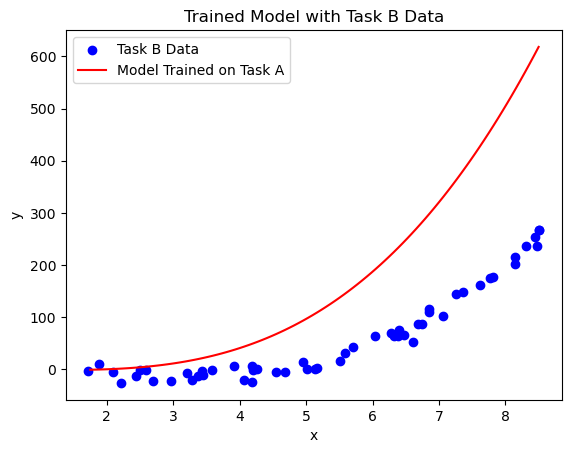

In [12]:
plt.scatter(X_B, y_B, color='blue', label='Task B Data')
plt.plot(np.linspace(1.75, 8.5, 100), phi_x(np.linspace(1.75, 8.5, 100), 3).T @ betas_A[-1], color='red', label='Model Trained on Task A')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model with Task B Data')
plt.legend()
plt.show()

In [13]:
print(f"Final loss on task A after training task A is {losses_A[-1]}")
print(f"Loss on task B after training task A is {loss(betas_A[-1], phi_x(X_B, 3), y_B)}")

Final loss on task A after training task A is 43.67534266286282
Loss on task B after training task A is 15586.31018594499


In [14]:
print(f"Beta values after training task A: {betas_A[-1]}")

Beta values after training task A: [ 0.43980602  0.54983954 -3.02903175  1.35484897]


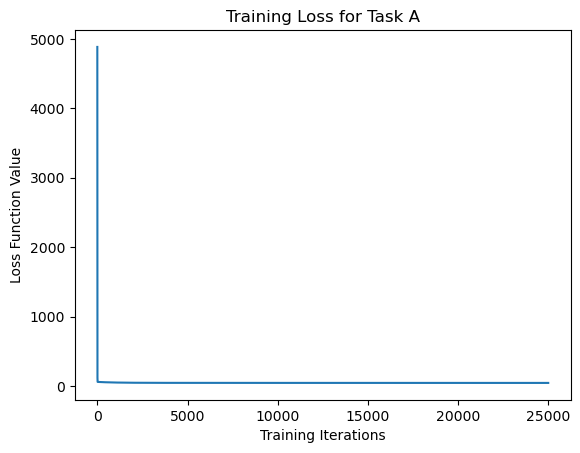

In [15]:
plt.plot(range(len((losses_A))), losses_A)
plt.xlabel('Training Iterations')
plt.ylabel('Loss Function Value')
plt.title('Training Loss for Task A')
plt.show()

In [16]:
losses_B, betas_B = train_task(X_B, y_B, learning_rate=1e-5, beta_0 = betas_A[-1], max_iterations=5000)

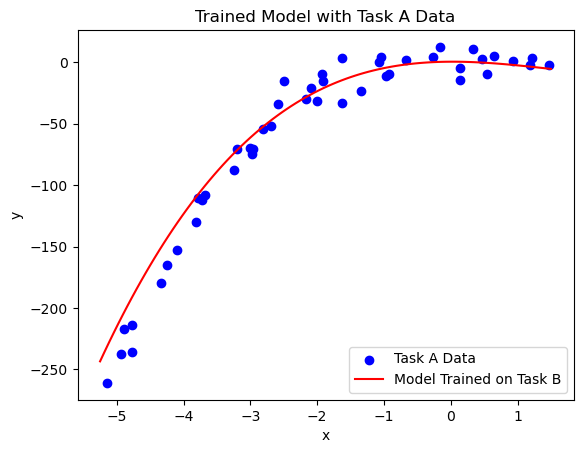

In [17]:
plt.scatter(X_A, y_A, color='blue', label='Task A Data')
plt.plot(np.linspace(-5.25, 1.5, 100), phi_x(np.linspace(-5.25, 1.5, 100), 3).T @ betas_B[-1], color='red', label='Model Trained on Task B')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model with Task A Data')
plt.legend()
plt.show()

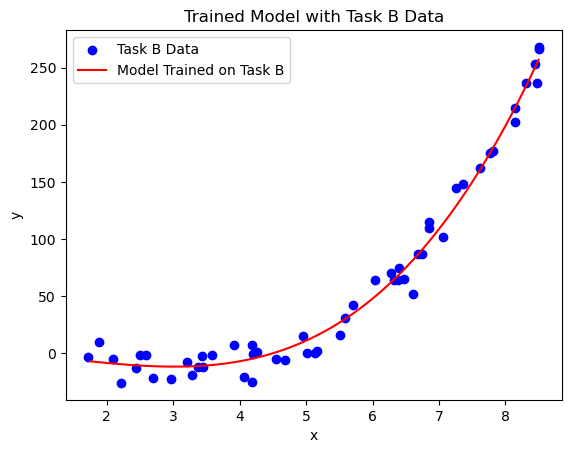

In [18]:
plt.scatter(X_B, y_B, color='blue', label='Task B Data')
plt.plot(np.linspace(1.75, 8.5, 100), phi_x(np.linspace(1.75, 8.5, 100), 3).T @ betas_B[-1], color='red', label='Model Trained on Task B')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model with Task B Data')
plt.legend()
plt.show()

In [19]:
print(f"Loss on task A after training task B is {loss(betas_B[-1], phi_x(X_A, 3), y_A)}")
print(f"Final loss on task B after training task B is {losses_B[-1]}")

Loss on task A after training task B is 108.66671591730558
Final loss on task B after training task B is 55.49685153125371


In [20]:
print(f"Beta values after training task B: {betas_B[-1]}")

Beta values after training task B: [ 0.35513686  0.21009881 -4.09656882  0.8968477 ]


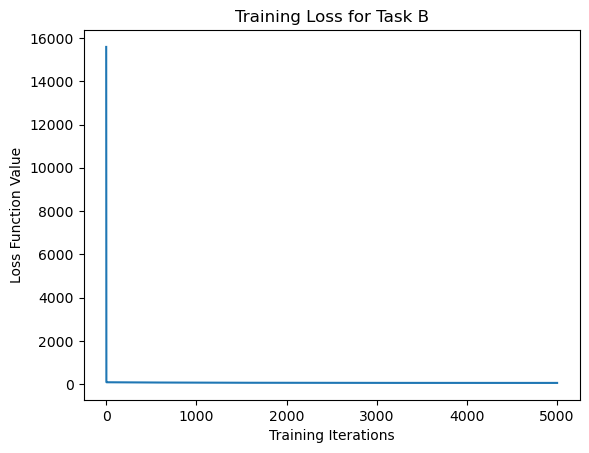

In [21]:
plt.plot(range(len((losses_B))), losses_B)
plt.xlabel('Training Iterations')
plt.ylabel('Loss Function Value')
plt.title('Training Loss for Task B')
plt.show()

In [22]:
for iteration in [0, 1, 2, 5, 10, 50, 100, 250, 500, 1000, 2000, 5000]:
    print(f"Loss on task A after training task B for {iteration} iterations is {loss(betas_B[iteration], phi_x(X_A, 3), y_A)}")
    print(f"Loss on task B after training task B for {iteration} iterations is {losses_B[iteration]}\n")

Loss on task A after training task B for 0 iterations is 43.67534266286282
Loss on task B after training task B for 0 iterations is 15586.31018594499

Loss on task A after training task B for 1 iterations is 324.9100081427626
Loss on task B after training task B for 1 iterations is 396.02849780617106

Loss on task A after training task B for 2 iterations is 409.88254105349006
Loss on task B after training task B for 2 iterations is 92.28545662570241

Loss on task A after training task B for 5 iterations is 424.27288729407945
Loss on task B after training task B for 5 iterations is 86.00682427065996

Loss on task A after training task B for 10 iterations is 423.20001664923404
Loss on task B after training task B for 10 iterations is 85.87014613689519

Loss on task A after training task B for 50 iterations is 414.4192047068177
Loss on task B after training task B for 50 iterations is 84.79865984312373

Loss on task A after training task B for 100 iterations is 403.801318978858
Loss on ta

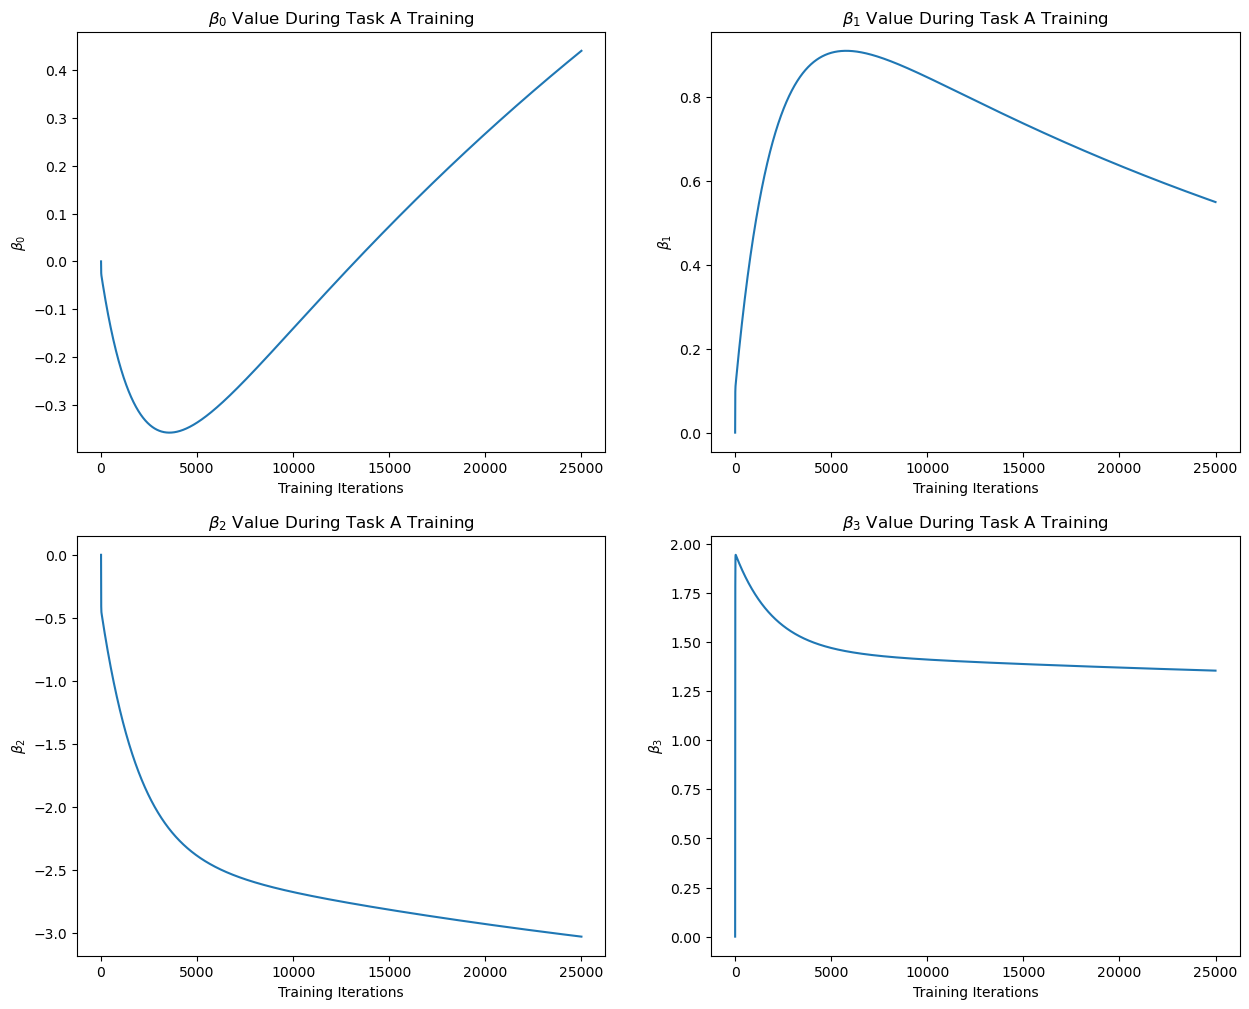

In [23]:
plt.figure(figsize=(15, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(range(np.array(betas_A)[:, i].shape[0]), np.array(betas_A)[:, i])
    plt.xlabel('Training Iterations')
    plt.ylabel(fr'$\beta_{i}$')
    plt.title(fr'$\beta_{i}$ Value During Task A Training')
plt.show()

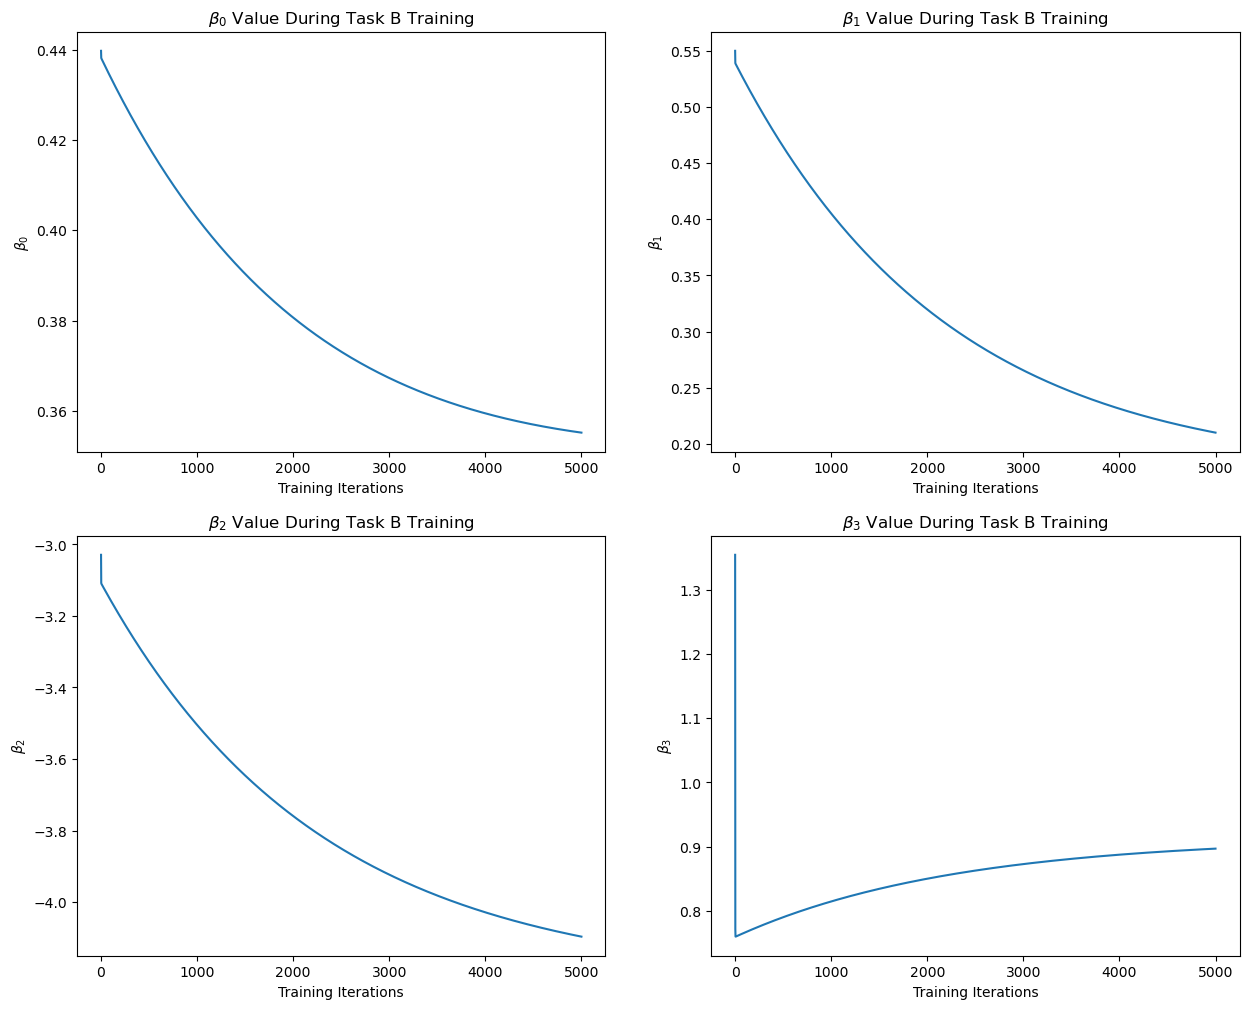

In [24]:
plt.figure(figsize=(15, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(range(np.array(betas_B)[:, i].shape[0]), np.array(betas_B)[:, i])
    plt.xlabel('Training Iterations')
    plt.ylabel(fr'$\beta_{i}$')
    plt.title(fr'$\beta_{i}$ Value During Task B Training')
plt.show()